# Part Onr

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/michele/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/michele/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
#1 

with open('TrainingDataPositive.txt', 'r', encoding='utf-8') as f:
    positive_reviews = f.readlines()

with open('TrainingDataNegative.txt', 'r', encoding='utf-8') as f:
    negative_reviews = f.readlines()

with open('testSet.txt', 'r', encoding='utf-8') as f:
    test_reviews = f.readlines()

# Assign labels
train_data = pd.DataFrame({
    'review': positive_reviews + negative_reviews,
    'label': [1] * len(positive_reviews) + [0] * len(negative_reviews)
})

# Create test labels (0–2988 -> positive, 2989–4320 -> negative)
test_labels = [1 if i <= 2988 else 0 for i in range(len(test_reviews))]

test_data = pd.DataFrame({
    'review': test_reviews,
    'label': test_labels
})

print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)


Train Data Shape: (11248, 2)
Test Data Shape: (4321, 2)


In [6]:
#2

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [stemmer.stem(word) for word in tokens if word.isalpha() and word not in stop_words]
    return " ".join(tokens)

# Apply preprocessing
train_data['cleaned_review'] = train_data['review'].apply(preprocess)
test_data['cleaned_review'] = test_data['review'].apply(preprocess)

# Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_data['cleaned_review'])
X_test = vectorizer.transform(test_data['cleaned_review'])
y_train = train_data['label']
y_test = test_data['label']

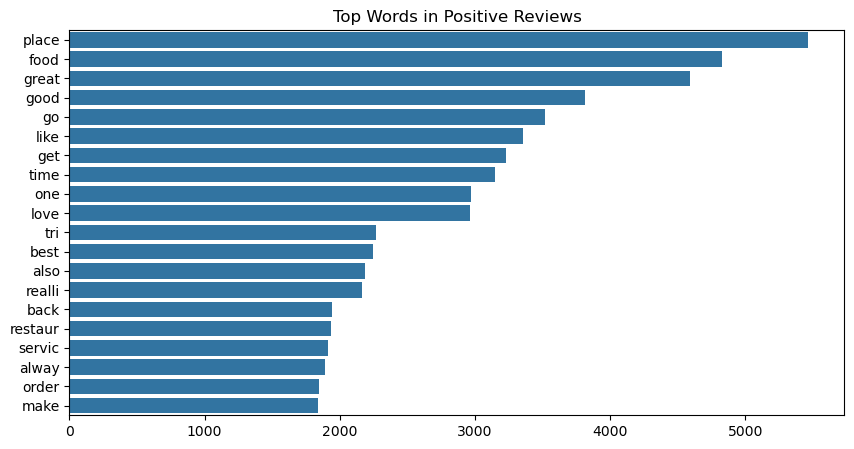

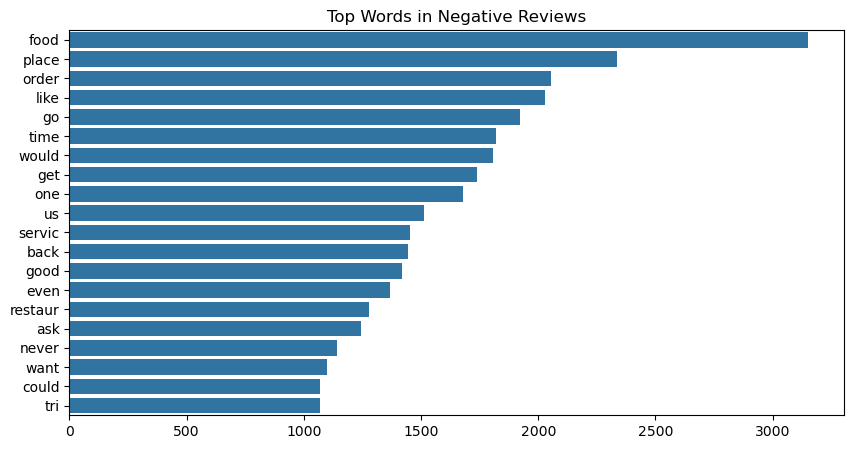

In [7]:


from collections import Counter

def plot_top_words(texts, title):
    words = " ".join(texts).split()
    counter = Counter(words)
    common_words = counter.most_common(20)
    words, counts = zip(*common_words)
    plt.figure(figsize=(10,5))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(title)
    plt.show()

# Positive reviews
plot_top_words(train_data[train_data['label']==1]['cleaned_review'], "Top Words in Positive Reviews")

# Negative reviews
plot_top_words(train_data[train_data['label']==0]['cleaned_review'], "Top Words in Negative Reviews")


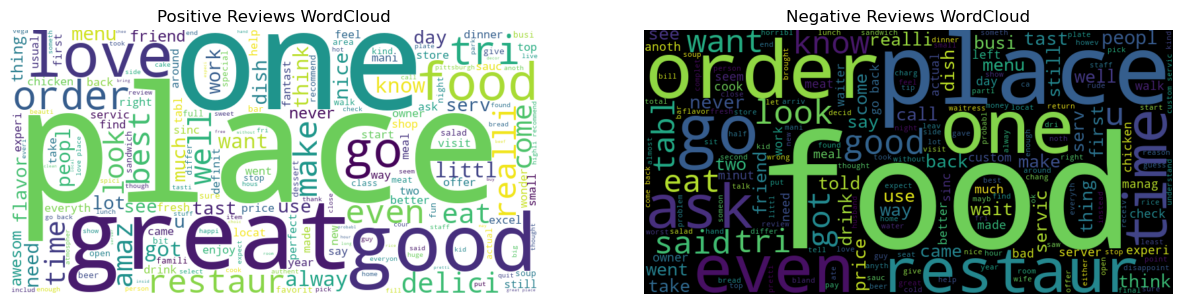

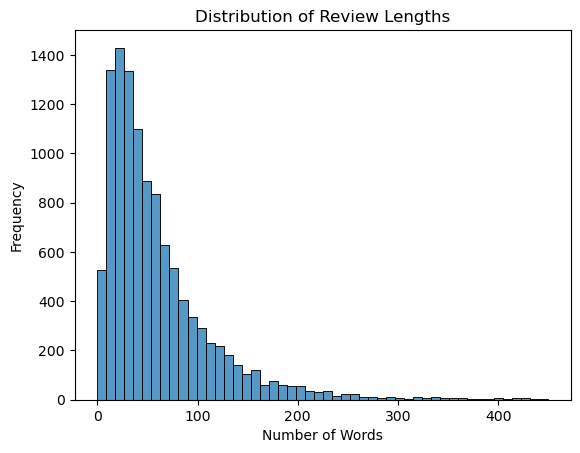

In [8]:
# Word Cloud
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(" ".join(train_data[train_data['label']==1]['cleaned_review']))
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(" ".join(train_data[train_data['label']==0]['cleaned_review']))

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews WordCloud")

plt.subplot(1,2,2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Reviews WordCloud")
plt.show()

# Review Length Distribution
train_data['review_length'] = train_data['cleaned_review'].apply(lambda x: len(x.split()))
sns.histplot(train_data['review_length'], bins=50)
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# Interpretation:

Here, we can the see the most frequent words in both positive and negative reviews. 
The bigger the word, the higher the frequency it holds. We can also we the distribution of how long each review is, and the frequency of long vs short reviews.

In [11]:
#3
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# SVM Classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

Logistic Regression Accuracy: 0.9347
              precision    recall  f1-score   support

           0       0.96      0.82      0.89      1332
           1       0.93      0.98      0.95      2989

    accuracy                           0.93      4321
   macro avg       0.94      0.90      0.92      4321
weighted avg       0.94      0.93      0.93      4321



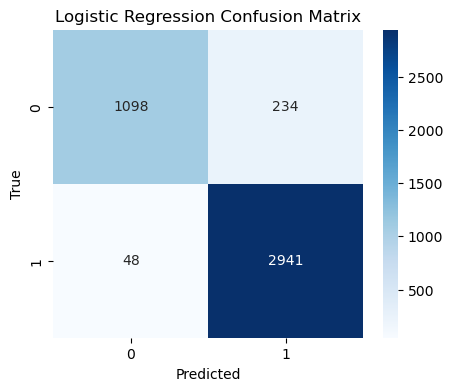

SVM Accuracy: 0.9465
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      1332
           1       0.95      0.97      0.96      2989

    accuracy                           0.95      4321
   macro avg       0.94      0.93      0.94      4321
weighted avg       0.95      0.95      0.95      4321



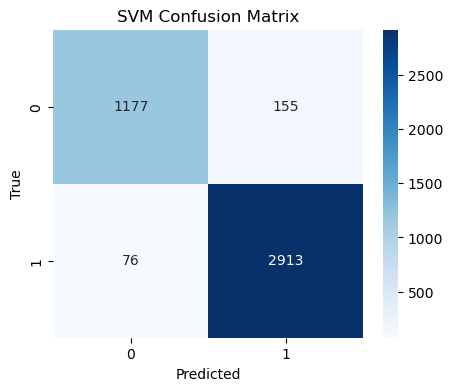

In [12]:
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    print(f"{model_name} Accuracy: {acc:.4f}")
    print(classification_report(y_true, y_pred))
    
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_lr, "Logistic Regression")

# Evaluate SVM
evaluate_model(y_test, y_pred_svm, "SVM")

# Model Discussion:

Both Logistic Regression and SVM achieved strong results in sentiment classification, with SVM slightly outperforming Logistic Regression. SVM reached a higher accuracy of 94.65% compared to Logistic Regression’s 93.47%. Additionally, SVM demonstrated a better balance between precision and recall, particularly improving performance on negative reviews. Overall, SVM is the preferred model for this task due to its superior classification metrics and handling of high-dimensional text data.



# Part 2:

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/michele/scikit_learn_data


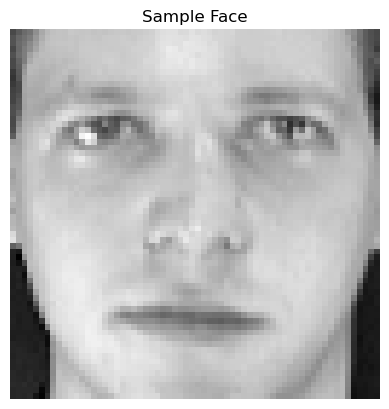

In [14]:
from sklearn.datasets import fetch_olivetti_faces

#1 

data = fetch_olivetti_faces()
images = data.images

# Display a sample
plt.imshow(images[0], cmap='gray')
plt.title('Sample Face')
plt.axis('off')
plt.show()

In [17]:
#2
left_halves = images[:, :, :32]  # columns 0–31
right_halves = images[:, :, 32:] # columns 32–63

In [19]:
#3

from sklearn.model_selection import train_test_split

# Flatten left and right halves
X = left_halves.reshape((left_halves.shape[0], -1))
y = right_halves.reshape((right_halves.shape[0], -1))

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
#4

from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR

# Create SVR model
svr = SVR(kernel='linear')
model = MultiOutputRegressor(svr)

# Train
model.fit(X_train, y_train)

MultiOutputRegressor(estimator=SVR(kernel='linear'))

In [22]:
#5

y_pred = model.predict(X_test)

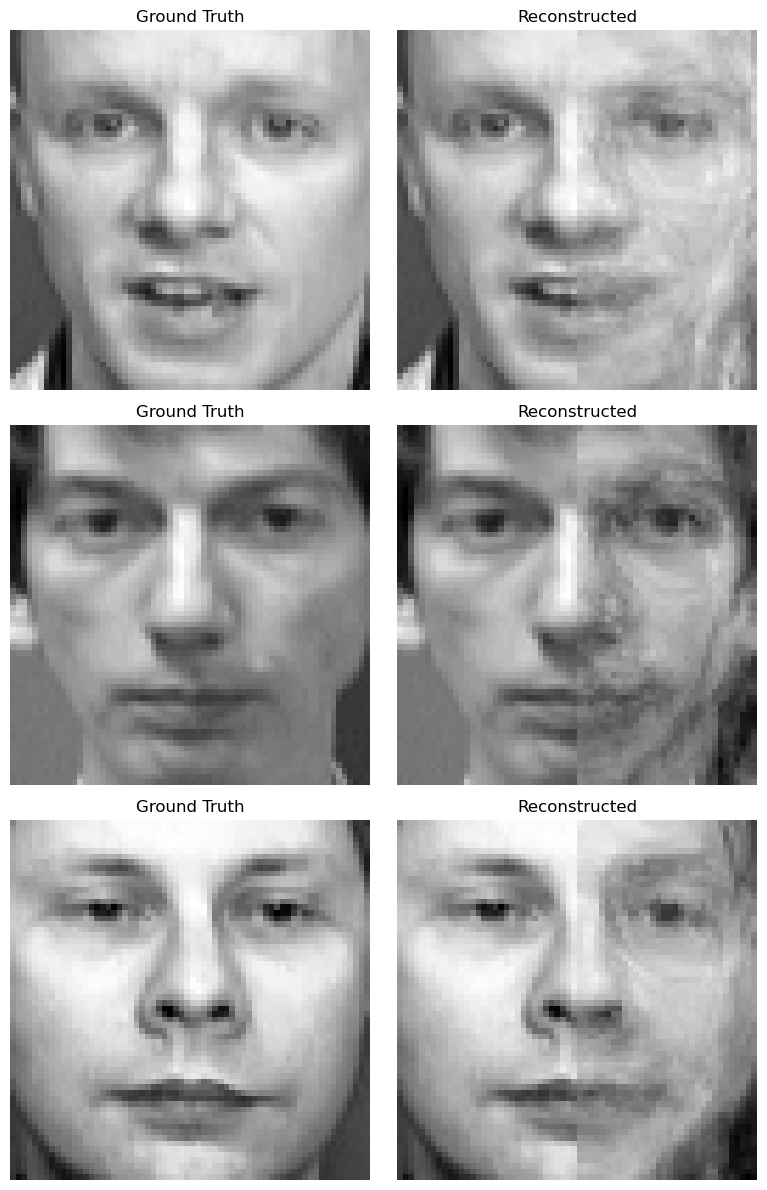

In [23]:
#6:
fig, axs = plt.subplots(3, 2, figsize=(8, 12))

for i in range(3):
    # Original left + true right
    true_img = np.hstack((X_test[i].reshape(64, 32), y_test[i].reshape(64, 32)))
    # Original left + predicted right
    pred_img = np.hstack((X_test[i].reshape(64, 32), y_pred[i].reshape(64, 32)))

    axs[i, 0].imshow(true_img, cmap='gray')
    axs[i, 0].set_title('Ground Truth')
    axs[i, 0].axis('off')

    axs[i, 1].imshow(pred_img, cmap='gray')
    axs[i, 1].set_title('Reconstructed')
    axs[i, 1].axis('off')

plt.tight_layout()
plt.show()

# Bomus:

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# 1.
X_train_small = X_train[:50]
y_train_small = y_train[:50]
X_test_small = X_test[:5]
y_test_small = y_test[:5]

# 2. Minimal Random Forest
rf = RandomForestRegressor(n_estimators=5, max_depth=5, random_state=42)
rf_model = MultiOutputRegressor(rf)

# 3. Train
print("Training Random Forest...")
rf_model.fit(X_train_small, y_train_small)
print("Done training.")

# 4. Predict
print("Predicting on test set...")
y_pred_rf = rf_model.predict(X_test_small)
print("Prediction complete.")

# 5.
fig, axs = plt.subplots(3, 2, figsize=(8, 8))

for i in range(3):
    true_img = np.hstack((X_test_small[i].reshape(64, 32), y_test_small[i].reshape(64, 32)))
    pred_img = np.hstack((X_test_small[i].reshape(64, 32), y_pred_rf[i].reshape(64, 32)))

    axs[i, 0].imshow(true_img, cmap='gray')
    axs[i, 0].set_title('Ground Truth')
    axs[i, 0].axis('off')

    axs[i, 1].imshow(pred_img, cmap='gray')
    axs[i, 1].set_title('Random Forest Reconstructed')
    axs[i, 1].axis('off')

plt.tight_layout()
plt.show()

# 6.
mse_rf = mean_squared_error(y_test_small, y_pred_rf)
r2_rf = r2_score(y_test_small, y_pred_rf)
print(f"Random Forest Small Test MSE: {mse_rf:.4f}, R2: {r2_rf:.4f}")
